# Build a spaCy Processing Pipeline



Our use case is to perform a sentiment analysis using spaCy.

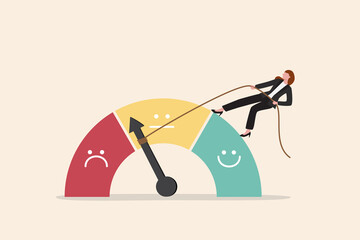

#Exercise #1:  Load Resources

In [ ]:
# SOLUTION

#Import pandas as pd
import pandas as pd

#Import spacy
import spacy

#Install spaCy
!pip install spacy

#Download the English langugage model for spaCy
!python -m spacy download en_core_web_sm

#Load the English model
nlp = spacy.load("en_core_web_sm") #Here, spacy.load, loads the English model and assigns it to variable nlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


When you execute nlp = spacy.load('en'), spaCy downloads and loads the pre-trained English language model into memory and assigns it to the variable nlp. This pre-trained model contains information about word vectors, part-of-speech tags, syntactic dependencies, and other linguistic features necessary for various NLP tasks.

##spaCy Procesing Pipeline

In spaCy, the order of tasks in the processing pipeline generally follows a predefined sequence, although it's also customizable. By default, spaCy's processing pipeline includes the following components in the specified order:



### Order of Tasks in the Processing Pipeline

| Order | Name         | Definition |
| :-----| :------ |: ---- |
| 1     | Tokenization | Input text is split into individual tokens, such as words and punctuation marks. |
| 2     | Stop Words    | Removes stop words from the text. |
| 3     | POS Tagging   | Assigns grammatical labels (e.g., noun, verb, adjective) to each token in the text based on its syntactic role within the sentence. |
| 4     | Dependency Parsing| Analyzes the grammatical structure of the text by determining the relationships |
| 5     |Lemmatization | Reduces tokens to their base or root form (lemmas)  |
| 6     |  Named Entity Recognition|  Identifies, categorizes persons, organizations, locations, dates, etc..|
| 7     | Other Use Case Tasks| May be included in pipelne (Sentiment Analysis) |


# Exercise #2:  Build a Simple Processing Pipeline

In [ ]:
# Example text
text = "A customer in New York City wants to give a review."

# Process the text using spaCy
doc = nlp(text)

# The nlp object is typically a loaded spaCy language model,
# such as the English language model ('en'). When you pass
# the text string to the nlp object, spaCy processes the text
# through its NLP pipeline.

# After executing doc = nlp(text), the variable doc contains a
# spaCy Doc object, which represents the processed version of the input text.

#-------------------------------------------------------------------------------
# SOLUTION

# Example text
text = "A customer in New York City wants to give a review."

# Process the text using spaCy
doc = nlp(text)

# The nlp object is typically a loaded spaCy language model,
# Tokenization
print("Tokenization:")
for token in doc:
    # Iterate through each token in the processed text and print the token text
    print(token.text)

print("\n")  # Add a newline for separation

# Filter out stop words
print("Filtered Tokens (without stop words):")
filtered_tokens = [token.text for token in doc if not token.is_stop]
# Create a list of tokens excluding stop words using list comprehension
print(filtered_tokens)

print("\n")  # Add a newline for separation

# Part-of-Speech Tagging (POS)
print("Part-of-Speech Tagging (POS):")
for token in doc:
    # Iterate through each token and print the token text and its POS tag
    print(token.text, token.pos_)

print("\n")  # Add a newline for separation

# Named Entity Recognition (NER)
print("Named Entity Recognition (NER):")
for ent in doc.ents:
    # Iterate through each named entity in the processed text and print its text and label
    print(ent.text, ent.label_)

print("\n")  # Add a newline for separation

# Lemmatization
print("Lemmatization:")
lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct]
# Create a list of lemmatized tokens excluding punctuation using list comprehension
print(lemmatized_tokens)


#Exercise #3: Build a Processing Pipeline

In [ ]:
# Run this cell.

file_path = '/content/sentiment_examples.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    sentiment_texts = file.readlines()

# After this block of code executes, the 'sentiment_texts' list contains
# all the lines of text read from the 'sentiment_examples.txt' file.

# The 'with' statement is used to open the file in a way that ensures it is automatically closed after the block of code inside the 'with' statement is executed.

# 'open(file_path, 'r', encoding='utf-8')' opens the file in read mode ('r') with UTF-8 encoding ('utf-8').
# 'as file' assigns the opened file object to the variable 'file', which can be used to read from the file.

# 'file.readlines()' reads all lines from the file and returns a list of strings, where each string corresponds to a line of text in the file.
# These strings are stored in the 'sentiment_texts' list for further processing.

In [ ]:
# Initialize empty lists to store the results
token_lists = []  # List to store tokens for each sentiment example
filtered_token_lists = []  # List to store filtered tokens (after stop word removal) for each sentiment example
pos_tag_lists = []  # List to store POS tags for each sentiment example
ner_lists = []  # List to store named entities for each sentiment example

# Process each sentiment example using spaCy and store the results
for sentiment_text in sentiment_texts:
    doc = nlp(sentiment_text.strip())  # Strip any leading/trailing whitespace
    #The .strip() method is used to clean up the sentiment_text
    #before passing it to the spaCy nlp pipeline for processing.
    #This ensures that there are no unwanted spaces or newline characters
    #that could affect the processing of the text by spaCy.

#-----------------------------------------------------------------------------
# SOLUTION

    # Tokenization
    tokens = [token.text for token in doc]  # Extract tokens from the processed text
    token_lists.append(tokens)  # Append tokens list to token_lists
    #Creates a list of tokens and appending it to the token_lists list.
    #This is done to store the tokens for each sentiment example.

    # Stop Word Removal filter
    filtered_tokens = [token.text for token in doc if not token.is_stop]  # Filter out stop words
    filtered_token_lists.append(filtered_tokens)  # Append filtered tokens list to filtered_token_lists


    # Part-of-Speech Tagging (POS tagging)
    pos_tags = [(token.text, token.pos_) for token in doc]  # Extract token text and POS tags
    pos_tag_lists.append(pos_tags)  # Append POS tags list to pos_tag_lists

    # Named Entity Recognition (NER)
    ner_entities = [(ent.text, ent.label_) for ent in doc.ents]  # Extract named entities and their labels
    ner_lists.append(ner_entities)  # Append named entities list to ner_lists

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Sentiment Example': sentiment_texts,
    'Tokens': token_lists,
    'Filtered Tokens': filtered_token_lists,
    'POS Tags': pos_tag_lists,
    'Named Entities': ner_lists
})

# Display the DataFrame
print(results_df)


                                   Sentiment Example  \
0  "I love the new features of your product! It h...   
1  "The customer support was exceptional in New Y...   
2  "The quality of your service exceeded my expec...   
3  "I'm extremely satisfied with my purchase. The...   
4  "The user interface is intuitive and easy to n...   
5  "I had a positive experience shopping on your ...   
6  "Your company values customer feedback, and it...   
7  "The pricing is fair, and the value I get in r...   
8  "I appreciate the personalized recommendations...   
9  "The delivery was prompt, and the packaging wa...   

                                              Tokens  \
0  [", I, love, the, new, features, of, your, pro...   
1  [", The, customer, support, was, exceptional, ...   
2  [", The, quality, of, your, service, exceeded,...   
3  [", I, 'm, extremely, satisfied, with, my, pur...   
4  [", The, user, interface, is, intuitive, and, ...   
5  [", I, had, a, positive, experience, shoppin

#Exercise #4 (Optional): Exploratory Data Analysis

Perform Data Analysis: You can perform various data analysis tasks on the processed data. For example, you can calculate statistics, count occurrences, or visualize the data using plots and charts.

Export Data to CSV or Excel: If you want to save the processed data for future use or analysis in other tools, you can export the DataFrame to a CSV or Excel file.

In [ ]:

# Write the DataFrame to a CSV file named 'processed_data.csv' without including the index
results_df.to_csv('processed_data.csv', index=False)

# Write the DataFrame to an Excel file named 'processed_data.xlsx' without including the index
results_df.to_excel('processed_data.xlsx', index=False)



In [ ]:

# Read the CSV file 'processed_data.csv' into a Pandas DataFrame called processed_df
# Specify the encoding as 'latin-1' to handle special characters if present
processed_df = pd.read_csv('/content/processed_data.csv', encoding='latin-1')


In [ ]:
processed_df.head()

,Sentiment Example,Tokens,Filtered Tokens,POS Tags,Named Entities
0,"""I love the new features of your product! It h...","['""', 'I', 'love', 'the', 'new', 'features', '...","['""', 'love', 'new', 'features', 'product', '!...","[('""', 'PUNCT'), ('I', 'PRON'), ('love', 'VERB...",[]
1,"""The customer support was exceptional in New Y...","['""', 'The', 'customer', 'support', 'was', 'ex...","['""', 'customer', 'support', 'exceptional', 'N...","[('""', 'PUNCT'), ('The', 'DET'), ('customer', ...","[('New York', 'GPE')]"
2,"""The quality of your service exceeded my expec...","['""', 'The', 'quality', 'of', 'your', 'service...","['""', 'quality', 'service', 'exceeded', 'expec...","[('""', 'PUNCT'), ('The', 'DET'), ('quality', '...","[('Prague', 'GPE')]"
3,"""I'm extremely satisfied with my purchase. The...","['""', 'I', ""'m"", 'extremely', 'satisfied', 'wi...","['""', 'extremely', 'satisfied', 'purchase', '....","[('""', 'PUNCT'), ('I', 'PRON'), (""'m"", 'AUX'),...",[]
4,"""The user interface is intuitive and easy to n...","['""', 'The', 'user', 'interface', 'is', 'intui...","['""', 'user', 'interface', 'intuitive', 'easy'...","[('""', 'PUNCT'), ('The', 'DET'), ('user', 'NOU...",[]


In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sentiment Example  10 non-null     object
 1   Tokens             10 non-null     object
 2   Filtered Tokens    10 non-null     object
 3   POS Tags           10 non-null     object
 4   Named Entities     10 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


Calculate the count of tokens for each sentiment.

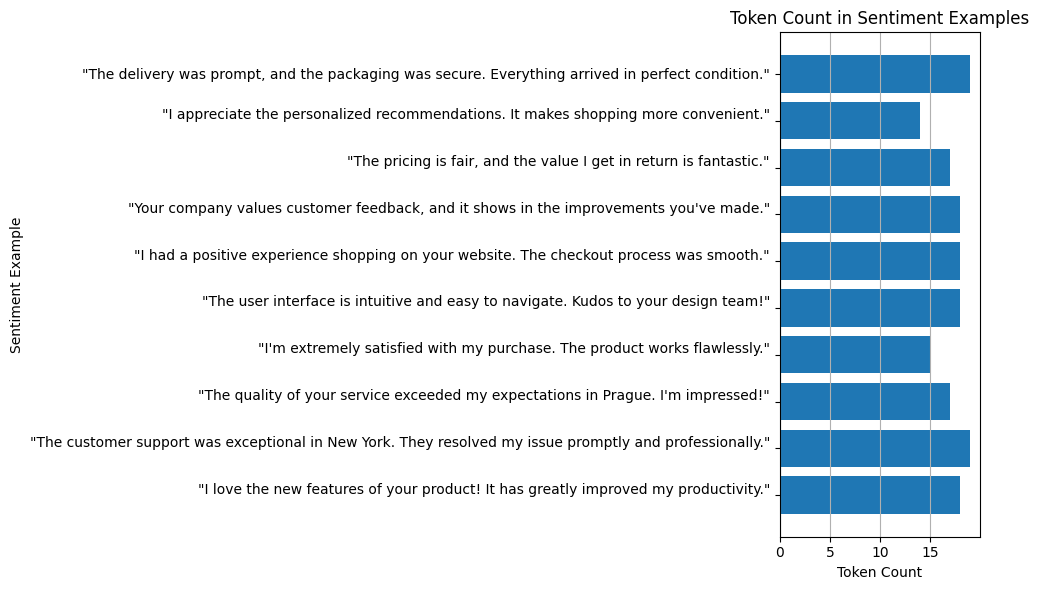

In [ ]:
import matplotlib.pyplot as plt #Library for plotting.

# Load the processed data from the CSV file
file_path = '/content/processed_data.csv'  # Update with the path to your processed data CSV file
processed_data = pd.read_csv(file_path)

# Calculate the count of tokens for each sentiment example
token_counts = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(processed_data['Sentiment Example'], token_counts)  # Horizontal bar chart
plt.xlabel('Token Count')  # X-axis label
plt.ylabel('Sentiment Example')  # Y-axis label
plt.title('Token Count in Sentiment Examples')  # Chart title
plt.grid(axis='x')  # Show grid lines on the x-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

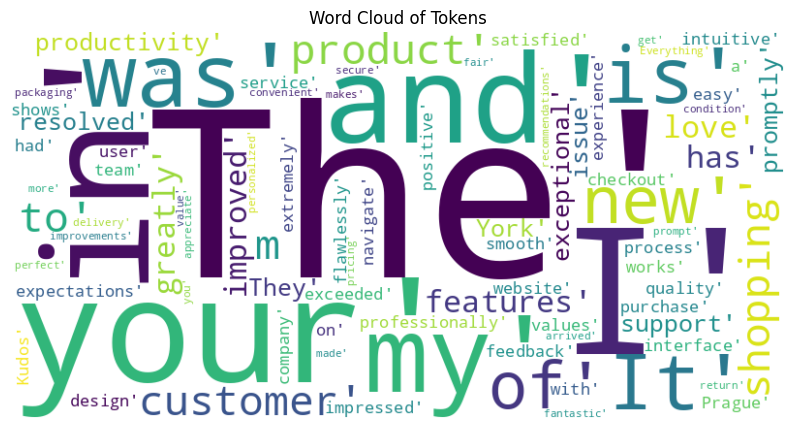

In [ ]:
from wordcloud import WordCloud

# Combine all tokens into a single text
all_tokens = ' '.join(processed_data['Tokens'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud of Tokens')
plt.show()



Histogram of Token Lengths: Visualize the distribution of token lengths in the sentiment examples. This can give insights into the length of words used in the text.

<ipython-input-25-5648bdd5f0cc>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping labels


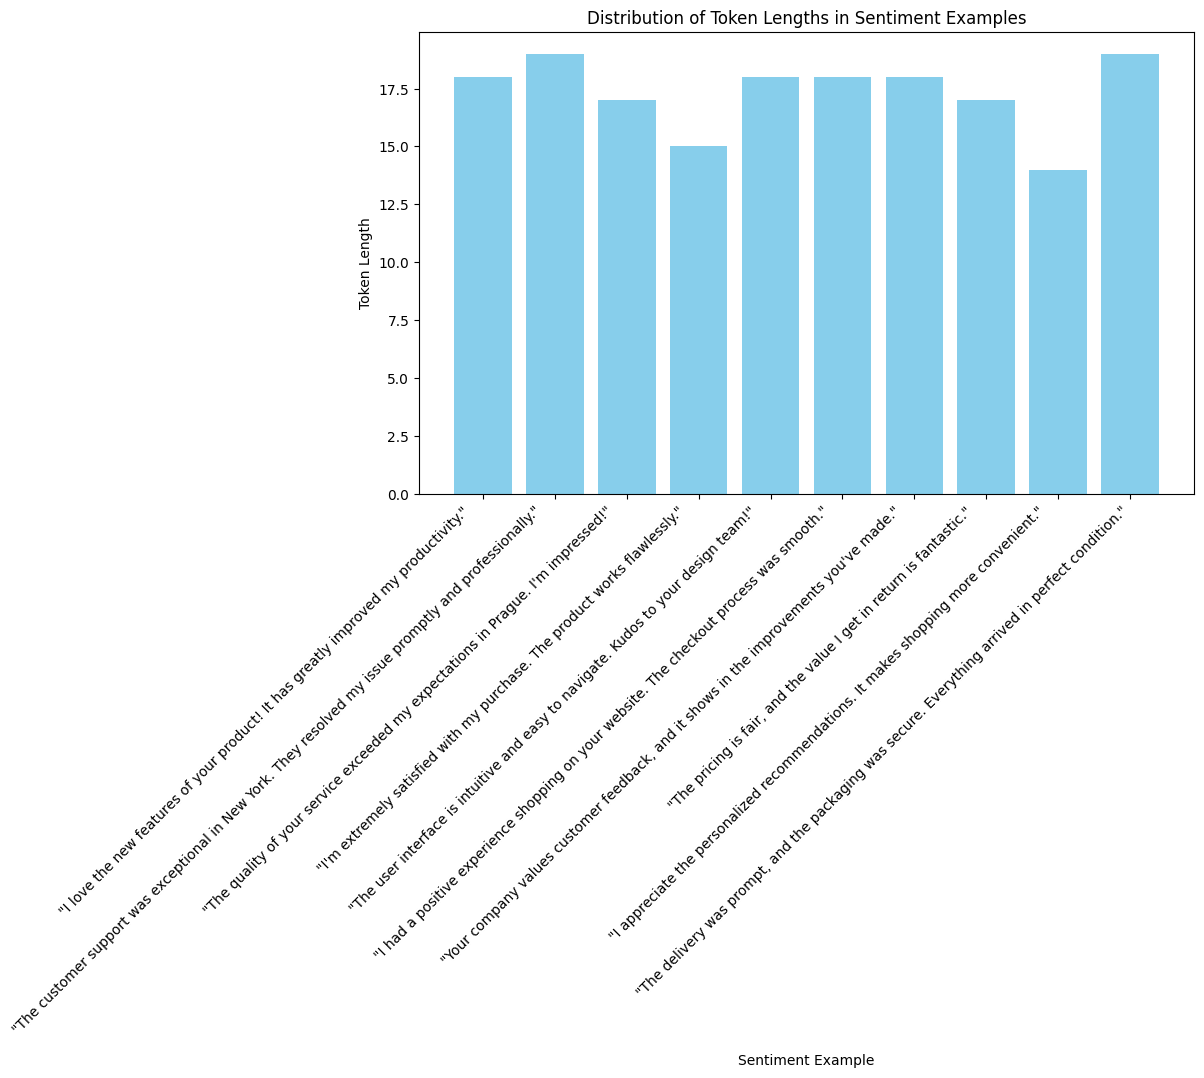

In [ ]:

# Calculate token lengths for each sentiment example
processed_data['Token Length'] = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a bar chart to visualize token lengths
plt.figure(figsize=(10, 6))
plt.bar(processed_data['Sentiment Example'], processed_data['Token Length'], color='skyblue')
plt.xlabel('Sentiment Example')
plt.ylabel('Token Length')
plt.title('Distribution of Token Lengths in Sentiment Examples')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()




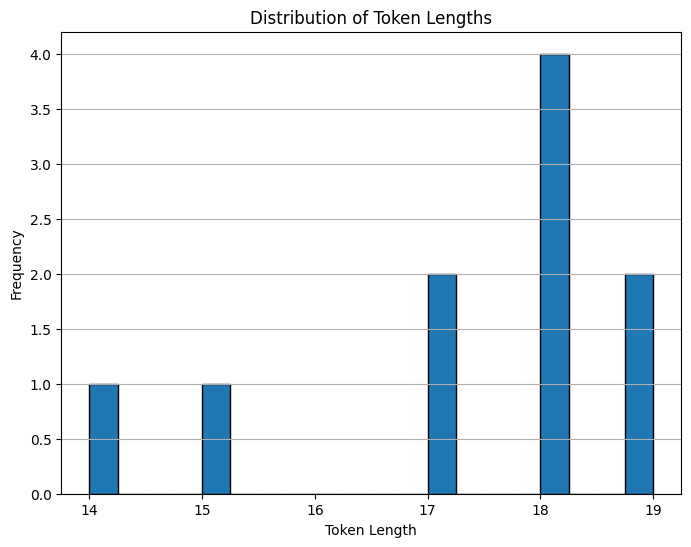

In [ ]:
# Calculate token lengths
token_lengths = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(token_lengths, bins=20, edgecolor='black')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths')
plt.grid(axis='y')
plt.show()


Word Cloud of Tokens: Create a word cloud to visualize the most common words in the sentiment examples. This can highlight frequently used words and themes.